In [16]:
# Inclusão de bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import math

In [17]:
def f1(a, b):
    return -(b * b)


def sol_analitica_1(x):
    return 1 / (x + 1)

In [18]:
def RK4(f, t, y, h):

    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)

    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)


def abPassoTriplo(f, x, y, h, i):
    y[i] = y[i-1] + h/12 * (23 * f(x[i-1], y[i-1]) - 16 * f(x[i-2], y[i-2]) + 5 * f(x[i-3], y[i-3]))
    

def amPassoTriplo(f, x, y, h, i):

    abPassoTriplo(f, x, y, h, i)

    y[i] = y[i-1] + h/24 * (9 * f(x[i], y[i]) + 19 * f(x[i-1], y[i-1]) - 5 * f(x[i-2], y[i-2]) + f(x[i-3], y[i-3]))

In [ ]:
# Constantes do PVI e do problema

lista_h = [0.1, 0.01, 0.001, 0.0001]
lista_x = []
lista_y = {'AB': [], 'AM': [], 'Euler': [], 'Euler Regressivo': []}
erros_abs = {'AB': [], 'AM': [], 'Euler': [], 'Euler Regressivo': []}
truncamento_global = {'AB': [], 'AM': [], 'Euler': [], 'Euler Regressivo': []}

y0 = 1
x0 = 0
xf = 5

In [ ]:
for h in lista_h:
    N = int((xf - x0) / h)

    x = np.linspace(x0, xf, N + 1)

    y_AB = np.zeros_like(x)
    y_AM = np.zeros_like(x)

    y_AB[0] = y0
    y_AM[0] = y0

    for n in range(N):
        if n < 3:
            y_AB[n+1] = RK4(f1, x[n], y_AB[n], h)
            y_AM[n+1] = RK4(f1, x[n], y_AM[n], h)
            
        else:
            abPassoTriplo(f1, x, y_AB, h, n+1)
            amPassoTriplo(f1, x, y_AM, h, n+1)

    lista_x.append(x)

    lista_y['AB'].append(y_AB)
    lista_y['AM'].append(y_AM)

    erros_abs['AB'].append(abs(sol_analitica_1(x) - y_AB))
    erros_abs['AM'].append(abs(sol_analitica_1(x) - y_AM))

        


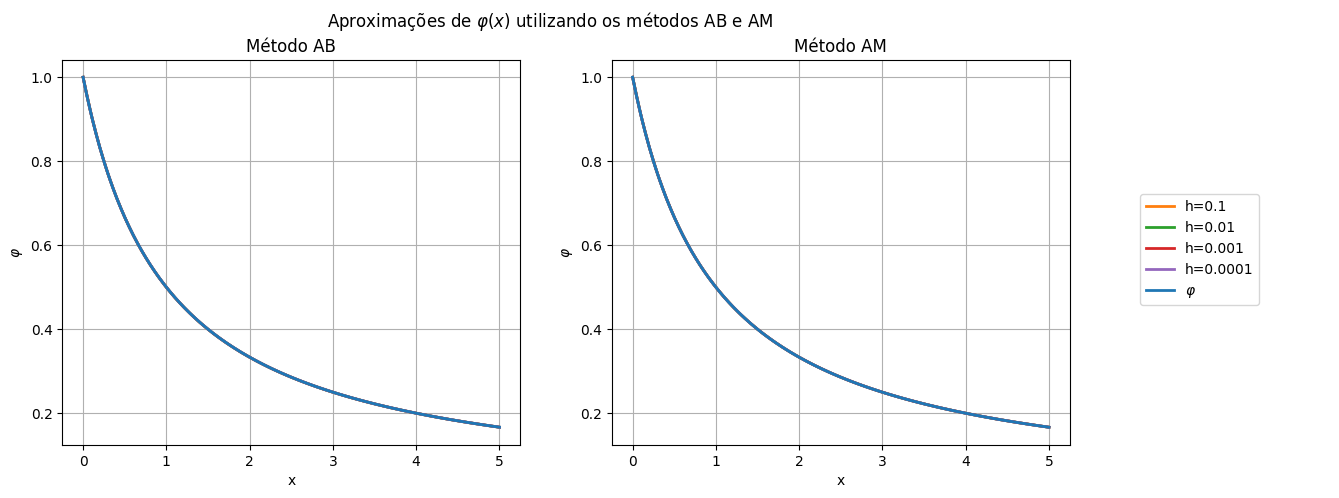

In [21]:
x1 = np.linspace(x0, xf, 100)
y1 = sol_analitica_1(x1)

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(r'Aproximações de $\varphi(x)$ utilizando os métodos AB e AM')

# Figura 1:
axs[0].set_title('Método AB')
axs[0].set_ylabel(r'$\varphi$')
axs[0].set_xlabel('x')
axs[0].grid(True)

for j in range(len(lista_h)):
    axs[0].plot(lista_x[j], lista_y['AB'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[0].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)

# Figura 2:
axs[1].set_title('Método AM')
axs[1].set_ylabel(r'$\varphi$')
axs[1].set_xlabel('x')
axs[1].grid(True)

for j in range(len(lista_h)):
    axs[1].plot(lista_x[j], lista_y['AM'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[1].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)


# Legenda
legend_ax = fig.add_axes([0.9, 0.3, 0.2, 0.4]) 
legend_ax.axis("off") 
legend_ax.legend(*axs[0].get_legend_handles_labels(), loc="center") 

Ordem numérica encontrada no método AB: 2.91
Ordem numérica encontrada no método AM: 3.23


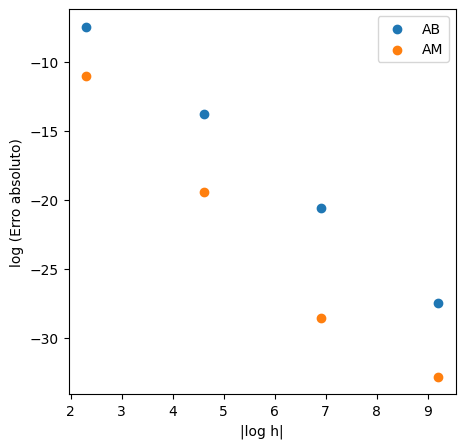

In [22]:
# Calculando o erro de truncamento global
truncamento_global['AB'] = np.array([max(erros_abs['AB'][i]) for i in range(len(lista_h))])
truncamento_global['AM'] = np.array([max(erros_abs['AM'][i]) for i in range(len(lista_h))])

# Plotando o log do erro versus o valor absoluto de log h
fig, ax_plot = plt.subplots(figsize=(5,5))

ax_plot.scatter(abs(np.log(lista_h)), np.log(truncamento_global['AB']), label='AB')
ax_plot.scatter(abs(np.log(lista_h)), np.log(truncamento_global['AM']), label='AM')

ax_plot.set_xlabel('|log h|')
ax_plot.set_ylabel('log (Erro absoluto)')
ax_plot.legend()

# Ordem numérica dos erros
ordem_AB = -np.polyfit(abs(np.log(lista_h)), np.log(truncamento_global['AB']), 1)[0]
ordem_AM = -np.polyfit(abs(np.log(lista_h)), np.log(truncamento_global['AM']), 1)[0]

print("Ordem numérica encontrada no método AB: %.2f" % ordem_AB)
print("Ordem numérica encontrada no método AM: %.2f" % ordem_AM)

In [23]:
def f2(a, b):
    return -100 * b

def sol_analitica_2(x):
    return math.e ** (-100 * x) 

xf = 2
lista_x = []

In [24]:
def euler(f, x, y, h):

    return y + h * f(x, y)

def euler_regressivo_f2(x, y, h):

    return y / (1 + 100 * h)

In [25]:
for h in lista_h:
    N = int((xf - x0) / h)

    x = np.linspace(x0, xf, N + 1)

    y_euler = np.zeros_like(x)
    y_euler_regressivo = np.zeros_like(x)

    y_euler[0] = y0
    y_euler_regressivo[0] = y0

    for n in range(N):
        y_euler[n+1] = euler(f2, x[n], y_euler[n], h)
        y_euler_regressivo[n+1] = euler_regressivo_f2(x[n], y_euler_regressivo[n], h)

    lista_x.append(x)

    lista_y['Euler'].append(y_euler)
    lista_y['Euler Regressivo'].append(y_euler_regressivo)

    erros_abs['Euler'].append(abs(sol_analitica_2(x) - y_euler))
    erros_abs['Euler Regressivo'].append(abs(sol_analitica_2(x) - y_euler_regressivo))    

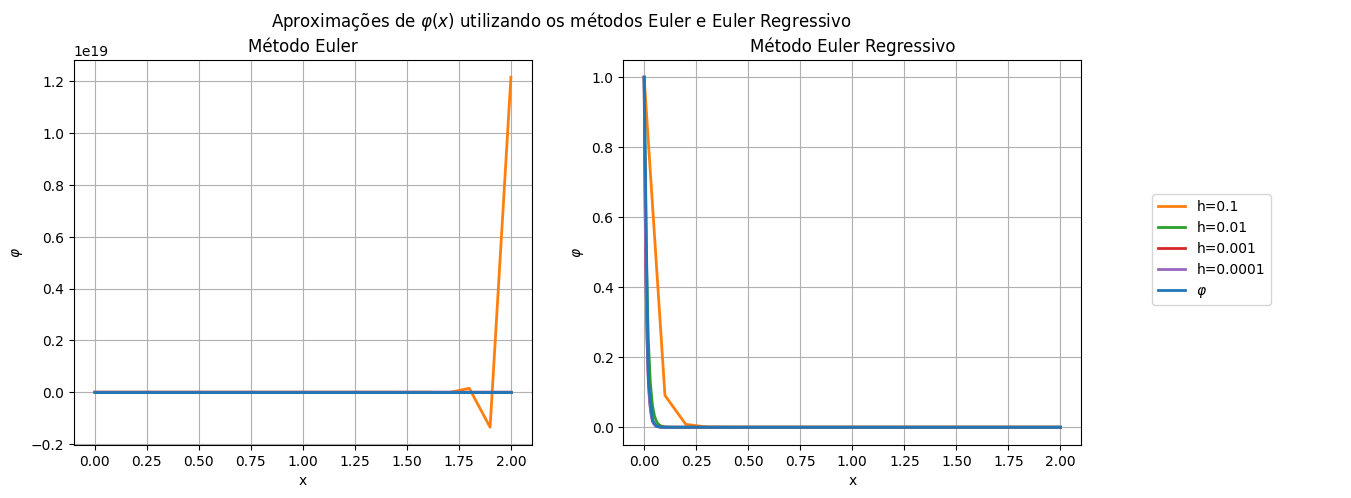

In [30]:
x1 = np.linspace(x0, xf, 100)
y1 = sol_analitica_2(x1)

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(r'Aproximações de $\varphi(x)$ utilizando os métodos Euler e Euler Regressivo')

# Figura 1:
axs[0].set_title('Método Euler')
axs[0].set_ylabel(r'$\varphi$')
axs[0].set_xlabel('x')
axs[0].grid(True)

for j in range(len(lista_h)):
    axs[0].plot(lista_x[j], lista_y['Euler'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[0].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)

# Figura 2:
axs[1].set_title('Método Euler Regressivo')
axs[1].set_ylabel(r'$\varphi$')
axs[1].set_xlabel('x')
axs[1].grid(True)

for j in range(len(lista_h)):
    axs[1].plot(lista_x[j], lista_y['Euler Regressivo'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[1].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)


# Legenda
legend_ax = fig.add_axes([0.9, 0.3, 0.2, 0.4]) 
legend_ax.axis("off") 
legend_ax.legend(*axs[0].get_legend_handles_labels(), loc="center") 
